### Imports Usados

In [2330]:
import math
import numpy as np
import matplotlib.pyplot as plt

### Constantes e Condições Iniciais

In [2331]:
k = 2.5
h = 0.05
const = k/h**2
Tbegin = 60
Tend = 40
t0 = 50.0

### Cáculo de N

In [2332]:
N = 1/h

# verifica se N pertence aos inteiros
if N != int(N):
    print("N não é inteiro")
else:
    N = int(N)
    print("N = ", N)

N =  20


### Constroi as matrizes utilizadas

In [2333]:
D2 = np.zeros((N, N))
BC = np.zeros(N)

In [2334]:
BC[0] = Tbegin
BC[N-1] = Tend

print('BC = ')
for i in range(N):
    print('|{:.2f}|'.format(BC[i]))

BC = 
|60.00|
|0.00|
|0.00|
|0.00|
|0.00|
|0.00|
|0.00|
|0.00|
|0.00|
|0.00|
|0.00|
|0.00|
|0.00|
|0.00|
|0.00|
|0.00|
|0.00|
|0.00|
|0.00|
|40.00|


In [2335]:
for i in range(N):
    D2[i][i] = -2
    if i > 0:
        D2[i][i-1] = 1
    if i < N-1:
        D2[i][i+1] = 1

print('D2 = ')
print(D2)

D2 = 
[[-2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  

### Função T'

In [2336]:
def function(t):
    return const * (D2 @ t + BC)

### Método de Euler

In [2337]:
def euler_step(t, step):
    return t + step * function(t)

### Método de Runge Kutta

In [2338]:
def runge_kutta_step(t, step):
    k1 = step * function(t)
    k2 = step * function(t + 0.5 * k1)
    k3 = step * function(t + 0.5 * k2)
    k4 = step * function(t + k3)
    return t + (k1 + 2*k2 + 2*k3 + k4) / 6

### Resolve o Sistema Utilizando os Métodos

In [2339]:
def solver(t, t_end, dt, step_method):
    time_steps = int(t_end / dt)
    T_history = np.zeros((time_steps, N))

    for i in range(time_steps): 
        T_history[i] = t
        t = step_method(t, dt)

    return T_history.T

### Escolhendo o passo de tempo

In [2340]:
min_step = 1/max(np.linalg.eig(abs(const*D2))[0])
time_simulation = 0.05

step = min_step
if time_simulation/min_step > 1000:
    print("Quantidade maxima de steps excedidas!")
    step = 0.05/1000

print("Passo de tempo escolhido:", step)

Passo de tempo escolhido: 0.0002514039874115484


### Plotagem das temperaturas em função do tempo

In [2341]:
def plot_line(array_data, step):
    plt.figure(figsize=(10, 5))
    for data in array_data:
        plt.plot([i*step for i in range(len(data))], data, linestyle='-')
    plt.ylabel('Temperatura (°C)')
    plt.xlabel('Tempo (S)')
    plt.yticks(array_data.T[len(array_data.T) -1])
    plt.grid(True)
    plt.show()

### Método de Euler

In [2342]:
result = solver(np.full(N, t0, dtype=float), time_simulation, step, euler_step)

In [2343]:
def plot_grid(array_data, step):
    # Dados
    temperaturas = array_data.T
    len_y = len(array_data[0])
    len_x = len(temperaturas[0])
    x_barra = [i*h for i in range(len_x + 6)]

    norm = plt.Normalize(vmin=temperaturas.min(), vmax=temperaturas.max())
    colors = plt.cm.Reds(norm(temperaturas)) 

    plt.figure(figsize=(9, 9)) 

    for t in range(len_y):
        for i in range(len_x):
            plt.fill_between(x_barra[i:i+2], t*step, (t+1)*step, color=colors[t, i], alpha=1)

            '''plt.text(x_barra[i], (t + 0.5) * step, f'{temperaturas[t, i]:.1f}', 
                    horizontalalignment='left', verticalalignment='center', 
                    fontsize=6, color='black')'''

    # Ajustando os limites dos eixos
    plt.xlim(0, 1)
    plt.ylim(0, time_simulation)  # Ajustando a altura do gráfico para acomodar o tempo
    #plt.yticks([])  # Marcas do eixo y (tempo)
    plt.xticks([i*h for i in range(N +1)])
    plt.xlabel('Distancia')
    plt.ylabel('Tempo')

    # Exibindo o gráfico
    plt.show()

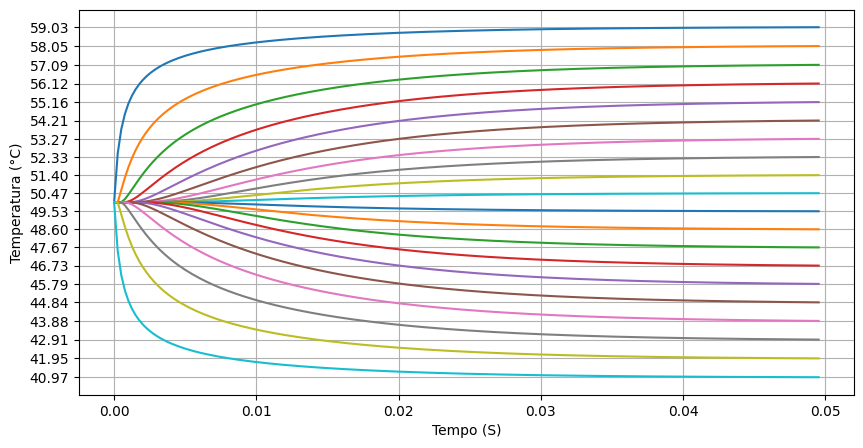

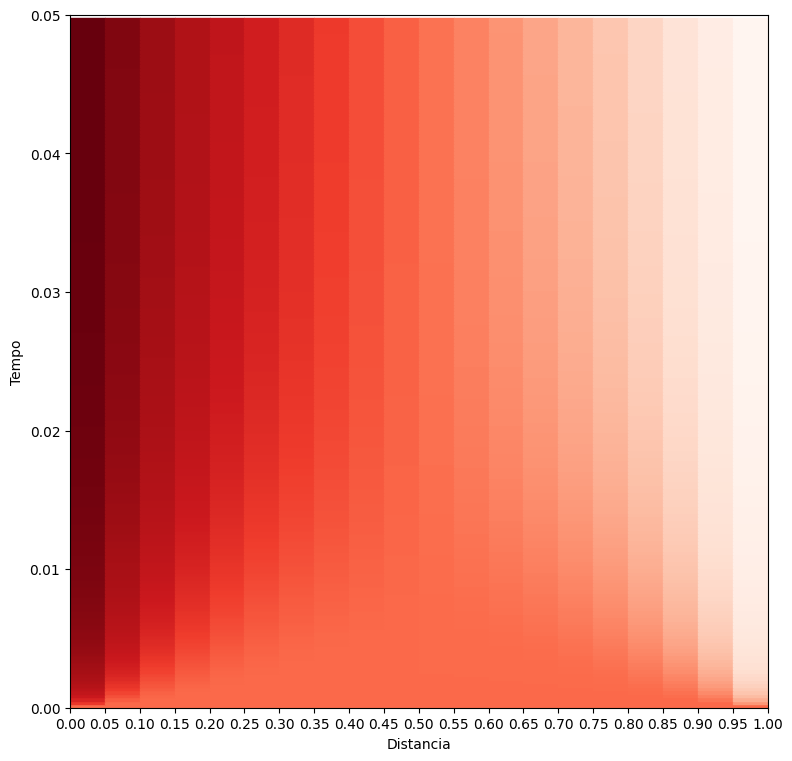

In [2344]:
plot_line(result, step)
plot_grid(result, step)
